## Python version 11.

In [1]:
!pip install pandas langdetect deep_translator spacy underthesea nltk


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 33.5/33.5 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip -V

pip 22.3.1 from C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)



In [4]:
!pip install matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import các thư viện cần thiết
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import re
import spacy
from underthesea import word_tokenize, pos_tag
from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [6]:
nlp_en = spacy.load('en_core_web_md')
stop_words_en = None
stop_words_vi = None

In [7]:
# Đường dẫn đến file csv chứa các job description
csv_jd = "../data/raw/itviec_jobs_undetected.csv"
stop_words_vn_txt = "../docs/vietnamese-stopwords.txt"

In [8]:
df = pd.read_csv(csv_jd)

In [9]:
print(df.head(10))

   id                                            title  \
0   1                                   MLops Engineer   
1   2              Senior DevOps Engineer (Cloud, AWS)   
2   3  VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure)   
3   4       VTS - Tư Vấn Giải Pháp - Presales Engineer   
4   5    VHT - Embedded Software Engineer (Linux, C++)   
5   6                  Quality Assurance Manager (QAM)   
6   7                Platform Manager (CDN ecosystems)   
7   8   Bridge Project Manager (BrSE/ IT Communicator)   
8   9    Senior Process Quality Assurance (PQA, QA QC)   
9  10     Hybrid - Ruby On Rails Developer (Ruby, SQL)   

                                             company     location  \
0                                    Trusting Social  Ho Chi Minh   
1                                              TymeX  Ho Chi Minh   
2                                      Viettel Group       Ha Noi   
3                                      Viettel Group       Ha Noi   
4               

In [10]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
def translate_to_english(text, lang):
    try:
        if lang == 'en' or pd.isna(text) or text.strip() == "":
            return text
        return GoogleTranslator(source=lang, target='en').translate(text)
    except Exception as e:
        print(f"Error translating: {e} | text: {text}")
        return text
def clean_text(text, lang='en'):
    if not isinstance(text, str) or not text.strip():
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|#\S+|@\S+|[^\w\s]|\n|\r|\t|\*|\•', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    if lang == 'en':
        doc = nlp_en(text)
        tokens = [token.lemma_ for token in doc if token.text not in stop_words_en]
        return ' '.join(tokens)
    else:
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if t not in stop_words_vi]
        return ' '.join(tokens)
def clean_skills(text):
    text.lower()
    if pd.isna(text) or text.strip() == "":
        return []
    return [t.strip() for t in text.split(',') if t.strip()]

In [11]:
# Áp dụng cho cột 'description'
df['language'] = df['description'].apply(detect_language)
df['skills_en'] = df['skills']

In [12]:
df['description_en'] = df.apply(lambda x: translate_to_english(x['description'], x['language']), axis=1)
df['requirements_en'] = df.apply(lambda x: translate_to_english(x['requirements'], x['language']), axis=1)

In [13]:
print(df.head())

   id                                            title          company  \
0   1                                   MLops Engineer  Trusting Social   
1   2              Senior DevOps Engineer (Cloud, AWS)            TymeX   
2   3  VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure)    Viettel Group   
3   4       VTS - Tư Vấn Giải Pháp - Presales Engineer    Viettel Group   
4   5    VHT - Embedded Software Engineer (Linux, C++)    Viettel Group   

      location           salary      work_type  \
0  Ho Chi Minh   You'll love it  Not specified   
1  Ho Chi Minh   You'll love it  Not specified   
2       Ha Noi   You'll love it  Not specified   
3       Ha Noi   You'll love it  Not specified   
4       Ha Noi  650 - 2,200 USD  Not specified   

                                         description  \
0  We are looking for qualified MLops Engineer fo...   
1  We are seeking an experienced Senior DevOps En...   
2  Ecotek đang dẫn dắt Ecopark phát triển trở thà...   
3  Gia nhập “vũ trụ” côn

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
with open(stop_words_vn_txt, 'r', encoding='utf-8') as f:
    stop_words_vi = set(word.strip() for word in f if word.strip())
stop_words_en = set(stopwords.words('english'))
print(stop_words_vi)
print(stop_words_en)

{'tìm ra', 'cao răng', 'cùng chung', 'ngày tháng', 'song le', 'tăng cấp', 'xăm xắm', 'âu là', 'được nước', 'lại người', 'hay tin', 'ít khi', 'chung chung', 'chuyển đạt', 'hay sao', 'chứ còn', 'đang', 'sang tay', 'đặt để', 'nhung nhăng', 'thậm cấp', 'vô luận', 'ba tăng', 'thêm vào', 'được cái', 'ơ', 'quá tin', 'khi nào', 'vốn dĩ', 'veo', 'lúc trước', 'dạ con', 'không cứ', 'bằng', 'để lại', 'tự', 'đó đây', 'ít nhiều', 'càng hay', 'lần trước', 'vì rằng', 'chưa có', 'chỉ', 'lên', 'tự khi', 'phỏng tính', 'ngoài này', 'không gì', 'kể như', 'nói ý', 'chợt nhìn', 'ở lại', 'trong ấy', 'bỏ mất', 'vượt', 'tốt mối', 'lâu nay', 'cách bức', 'lần', 'chị bộ', 'vô vàn', 'nhớ lấy', 'phỏng nước', 'mới hay', 'phóc', 'luôn cả', 'thẩy', 'ngoài ra', 'cơn', 'cùng', 'tự tạo', 'việc', 'lượng', 'tọt', 'ắt', 'chưa', 'xa gần', 'thường tính', 'nhận việc', 'mới rồi', 'cùng tột', 'nói qua', 'ngoải', 'thường tại', 'đặt làm', 'trong đó', 'ngày xưa', 'chỉ có', 'bất kỳ', 'tạo ý', 'có chăng là', 'đáng lẽ', 'tự tính', 'vùn

In [17]:
df['description_cleaned'] = df.apply(lambda x: clean_text(x['description_en'] if x['language'] == 'en' else x['description'], x['language']), axis=1)
df['requirements_cleaned'] = df.apply(lambda x: clean_text(x['requirements_en'] if x['language'] == 'en' else x['requirements'], x['language']), axis=1)
df['skills_cleaned'] = df['skills_en'].apply(lambda x: clean_skills(x))

In [18]:
print(df.head(10))

   id                                            title  \
0   1                                   MLops Engineer   
1   2              Senior DevOps Engineer (Cloud, AWS)   
2   3  VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure)   
3   4       VTS - Tư Vấn Giải Pháp - Presales Engineer   
4   5    VHT - Embedded Software Engineer (Linux, C++)   
5   6                  Quality Assurance Manager (QAM)   
6   7                Platform Manager (CDN ecosystems)   
7   8   Bridge Project Manager (BrSE/ IT Communicator)   
8   9    Senior Process Quality Assurance (PQA, QA QC)   
9  10     Hybrid - Ruby On Rails Developer (Ruby, SQL)   

                                             company     location  \
0                                    Trusting Social  Ho Chi Minh   
1                                              TymeX  Ho Chi Minh   
2                                      Viettel Group       Ha Noi   
3                                      Viettel Group       Ha Noi   
4               

In [19]:
df['location'].unique()

array(['Ho Chi Minh', 'Ha Noi', 'Others', 'Ha Noi - Ho Chi Minh',
       'Ha Noi - Da Nang', 'Ho Chi Minh - Da Nang',
       'Ho Chi Minh - Ha Noi', 'Ho Chi Minh - Ha Noi - Da Nang',
       'Ha Noi - Ho Chi Minh - Da Nang', 'Ha Noi - Da Nang - Ho Chi Minh',
       'Da Nang', 'Ho Chi Minh - Da Nang - Ha Noi',
       'Da Nang - Ho Chi Minh', 'Ha Noi - Ho Chi Minh - Others',
       'Lam Dong - Ho Chi Minh', 'Thai Nguyen', 'Binh Duong',
       'Ho Chi Minh - Ha Noi - Others', 'Ho Chi Minh - Others',
       'Da Nang - Ha Noi - Ho Chi Minh'], dtype=object)

In [20]:
locations = np.array([
    'Ho Chi Minh', 'Ha Noi', 'Others', 'Ha Noi - Ho Chi Minh',
    'Ha Noi - Da Nang', 'Ho Chi Minh - Da Nang',
    'Ho Chi Minh - Ha Noi', 'Ho Chi Minh - Ha Noi - Da Nang',
    'Ha Noi - Ho Chi Minh - Da Nang', 'Ha Noi - Da Nang - Ho Chi Minh',
    'Da Nang', 'Ho Chi Minh - Da Nang - Ha Noi',
    'Da Nang - Ho Chi Minh', 'Ha Noi - Ho Chi Minh - Others',
    'Lam Dong - Ho Chi Minh', 'Thai Nguyen', 'Binh Duong',
    'Ho Chi Minh - Ha Noi - Others', 'Ho Chi Minh - Others',
    'Da Nang - Ha Noi - Ho Chi Minh'
])

main_cities = {'Ha Noi', 'Ho Chi Minh'}

def classify_location_group(loc_str):
    # Tách và làm sạch địa điểm
    cities = [c.strip() for c in loc_str.split('-')]
    cities_set = set(cities)

    # Giao giữa cities_set và main_cities
    common_cities = cities_set & main_cities

    if common_cities == {'Ha Noi'}:
        return 1
    elif common_cities == {'Ho Chi Minh'}:
        return 2
    else:
        return 3

In [21]:
df['location_group'] = df['location'].apply(lambda x: classify_location_group(x))
print(df['location_group'].value_counts())
print(df['location_group'].head(10))

location_group
2    551
1    352
3     92
Name: count, dtype: int64
0    2
1    2
2    1
3    1
4    1
5    1
6    2
7    2
8    1
9    2
Name: location_group, dtype: int64


In [22]:
pd.DataFrame(df)

,id,title,company,location,salary,work_type,description,requirements,skills,language,skills_en,description_en,requirements_en,description_cleaned,requirements_cleaned,skills_cleaned,location_group
0,1,MLops Engineer,Trusting Social,Ho Chi Minh,You'll love it,Not specified,We are looking for qualified MLops Engineer fo...,BS or MS in Computer Science or related fields...,"MLOps, Python, Linux, Docker, Data Science, Te...",en,"MLOps, Python, Linux, Docker, Data Science, Te...",We are looking for qualified MLops Engineer fo...,BS or MS in Computer Science or related fields...,look qualified mlop engineer ekyc project help...,bs ms computer science relate field 1 3 year e...,"[MLOps, Python, Linux, Docker, Data Science, T...",2
1,2,"Senior DevOps Engineer (Cloud, AWS)",TymeX,Ho Chi Minh,You'll love it,Not specified,We are seeking an experienced Senior DevOps En...,Requirements:\nBachelor's or Master's degree i...,"AWS, DevOps, Cloud, Cloud-native Architecture,...",en,"AWS, DevOps, Cloud, Cloud-native Architecture,...",We are seeking an experienced Senior DevOps En...,Requirements:\nBachelor's or Master's degree i...,seek experienced senior devop engineer aw join...,requirement bachelor master degree computer sc...,"[AWS, DevOps, Cloud, Cloud-native Architecture...",2
2,3,VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure),Viettel Group,Ha Noi,You'll love it,Not specified,Ecotek đang dẫn dắt Ecopark phát triển trở thà...,"Tư duy logic tốt, tư duy hướng giải pháp, tư d...","Project Management, Business Analysis, Presale...",vi,"Project Management, Business Analysis, Presale...",Ecotek is leading Ecopark to develop a model o...,"Good logical thinking, solution -oriented thin...",ecotek dẫn dắt ecopark phát triển mô hình thàn...,tư duy logic tư duy hướng giải pháp tư duy phả...,"[Project Management, Business Analysis, Presal...",1
3,4,VTS - Tư Vấn Giải Pháp - Presales Engineer,Viettel Group,Ha Noi,You'll love it,Not specified,"Gia nhập “vũ trụ” công nghệ Viettel, nơi bạn k...",Bằng cấp: Tốt nghiệp Đại học (loại Khá trở lên...,"Presale, Business Analysis, Salesforce, Pre-sa...",vi,"Presale, Business Analysis, Salesforce, Pre-sa...","Joining Viettel technology, where you are not ...",Degree: Graduated from university (good or hig...,gia nhập vũ trụ công nghệ viettel đắm chìm hàn...,bằng cấp tốt nghiệp đại học trở chuyên ngành c...,"[Presale, Business Analysis, Salesforce, Pre-s...",1
4,5,"VHT - Embedded Software Engineer (Linux, C++)",Viettel Group,Ha Noi,"650 - 2,200 USD",Not specified,"Với hơn 1200 nhân sự chất lượng cao , Tổng Côn...",Tốt nghiệp Đại học chính quy loại Khá trở lên ...,"Embedded, C++, Linux, C language, Embedded Eng...",vi,"Embedded, C++, Linux, C language, Embedded Eng...","With more than 1200 high quality personnel, Vi...",Graduated with regular university or higher sp...,1200 nhân sự chất lượng tổng công ty công nghi...,tốt nghiệp đại học chính quy loại trở chuyên n...,"[Embedded, C++, Linux, C language, Embedded En...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,11,Chuyên viên (Hỗ trợ ứng dụng OPN),Ngân hàng TNHH MTV Việt Nam Hiện Đại (MBV),Ha Noi,Not specified,Not specified,No description available,No requirements specified,Not specified,fr,Not specified,No description available,No requirements SPECIFied,no description available,no requirements specified,[Not specified],1
991,12,Chuyên viên (Vận hành AM/DevOPs CI/CD),Ngân hàng TNHH MTV Việt Nam Hiện Đại (MBV),Ha Noi,Not specified,Not specified,No description available,No requirements specified,Not specified,fr,Not specified,No description available,No requirements SPECIFied,no description available,no requirements specified,[Not specified],1
992,13,Kỹ sư dữ liệu (DE) - Data Enginner,Ngân hàng TNHH MTV Việt Nam Hiện Đại (MBV),Ha Noi,Not specified,Not specified,No description available,No requirements specified,Not specified,fr,Not specified,No description available,No requirements SPECIFied,no description available,no requirements spec

In [23]:
for i in range(len(df)):
    df.at[i, 'id'] = "JOB_" + str(i)


C:\Users\DELL\AppData\Local\Temp\ipykernel_21788\1309361321.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'JOB_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'id'] = "JOB_" + str(i)


In [24]:
df['salary'].unique()

array(["You'll love it", '650 - 2,200 USD', 'Very attractive!!!',
       'Up to 18,000,000 vnđ', '800 - 1,000 USD', '3,000 - 6,000 USD',
       '2,000 - 5,000 USD', '900 - 1,600 USD', '700 - 1,800 USD',
       '1,000 - 2,500 USD', '800 - 3,500 USD', '700 - 1,000 USD',
       'Up to 30m', '2,500 - 3,000 USD', '2,000 - 4,000 USD',
       '500 - 1,000 USD', 'Negotiation', '1,000 - 1,400 USD',
       '1,000 - 3,500 USD', 'Not specified', 'Lương cao thỏa thuận',
       'Negotiable', '1,000 - 2,000 USD', '1,800 - 3,500 USD',
       'Tới 35 triệu'], dtype=object)

In [25]:
df.drop(columns=['work_type'], inplace=True)

In [26]:
def extract_min_salary(s):
    if not isinstance(s, str):
        return 'agreement'

    s = s.lower()

    # Nhóm 5: lương thỏa thuận
    if any(keyword in s for keyword in ['not specified', 'negotiation', 'negotiable', 'thỏa thuận', "you'll love it", 'attractive']):
        return 'agreement'

    # Lương VNĐ có đơn vị triệu hoặc 'm'
    if 'm' in s or 'triệu' in s:
        match = re.findall(r'\d+', s)
        if match:
            usd = int(match[0]) * 1_000_000 / 24000  # đổi sang USD
            return usd

    # Lương USD
    match = re.findall(r'\d+(?:,\d+)?', s)
    if match:
        nums = [int(x.replace(',', '')) for x in match]
        return min(nums)

    return 'agreement'

def classify_salary(s):
    val = extract_min_salary(s)

    if val == 'agreement':
        return 5
    elif val < 500:
        return 1
    elif val < 2000:
        return 2
    elif val < 5000:
        return 3
    else:
        return 4

In [27]:
df['type_salary'] = df['salary'].apply(classify_salary)

In [28]:
df['type_salary'].unique()

array([5, 2, 1, 3], dtype=int64)

In [29]:
# Chuẩn hóa chữ thường và lọc các dòng KHÔNG chứa 'no description available'
df = df[~df['description'].str.lower().str.contains('no description available', na=False)]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    841 non-null    object
 1   title                 841 non-null    object
 2   company               841 non-null    object
 3   location              841 non-null    object
 4   salary                841 non-null    object
 5   description           841 non-null    object
 6   requirements          841 non-null    object
 7   skills                841 non-null    object
 8   language              841 non-null    object
 9   skills_en             841 non-null    object
 10  description_en        841 non-null    object
 11  requirements_en       841 non-null    object
 12  description_cleaned   841 non-null    object
 13  requirements_cleaned  841 non-null    object
 14  skills_cleaned        841 non-null    object
 15  location_group        841 non-null    int64 


[('PHP', 237), ('Java', 209), ('OOP', 196), ('CI/CD', 156), ('NodeJS', 150), ('Backend Developer', 149), ('HTML5', 142), ('CSS', 142), ('Tester', 115), ('DevOps', 113), ('Cloud', 95), ('Fullstack', 88), ('JavaScript', 88), ('Laravel', 88), ('Fullstack Developer', 88), ('QA QC', 86), ('Python', 83), ('Cyber Security', 69), ('Japanese', 67), ('Windows', 64), ('Data Engineer', 63), ('AI', 63), ('Securities & Investment', 61), ('VBA', 61), ('ReactJS', 59), ('Linux', 57), ('Android', 57), ('iOS', 57), ('SQL', 57), ('Network and Infrastructure', 56), ('English', 56), ('TypeScript', 54), ('Frontend Developer', 54), ('Project Management', 53), ('ISO 27001', 49), ('PQA', 47), ('Team Management', 47), ('IT Audit', 47), ('Flutter', 47), ('Dart', 47)]


C:\Users\DELL\AppData\Local\Temp\ipykernel_21788\3902463915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')


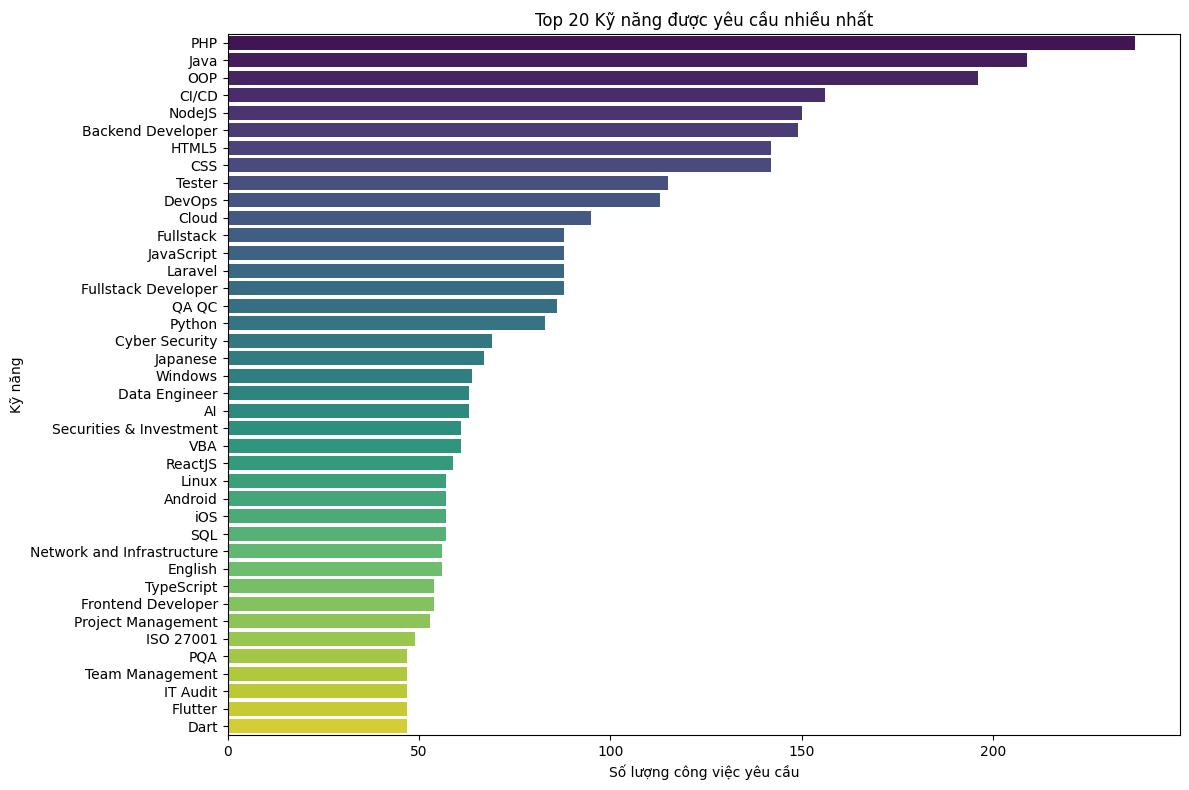

In [42]:
skills_series = df['skills'].str.split(',').explode().str.strip()

# Count the most common skills
skill_counts = Counter(skills_series)
top_skills = skill_counts.most_common(40)
print(top_skills)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title('Top 40 Kỹ năng được yêu cầu nhiều nhất')
plt.xlabel('Số lượng công việc yêu cầu')
plt.ylabel('Kỹ năng')
plt.tight_layout()
plt.show()

In [35]:
skills_to_remove = [
    'IT Services and IT Consulting', 'Software Development Outsourcing', 'Software Products and Web Services', 'Telecommunication','Financial Services', 'Banking','Bridge System Engineer (BrSE)','Japanese IT Communication'
]

# Đưa về dạng chữ thường để so sánh không phân biệt hoa thường
skills_to_remove = [s.lower() for s in skills_to_remove]


In [38]:
def remove_unwanted_skills(skill_string):
    if pd.isna(skill_string):
        return skill_string
    skills = [s.strip() for s in skill_string.split(',')]
    filtered = [s for s in skills if s.lower() not in skills_to_remove]
    return ', '.join(filtered)
def extract_primary_skills(text):
    # Xử lý trường hợp text không phải chuỗi
    if not isinstance(text, str) or pd.isna(text):
        return []
    return [skill for skill in primary_skills if skill in text.lower()]

def extract_secondary_skills(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    return [skill for skill in secondary_skills if skill in text.lower()]

def extract_adjectives(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    doc = nlp_en(text)
    return list(set([token.text for token in doc if token.pos_ == 'ADJ']))

def extract_adverbs(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    doc = nlp_en(text)
    return list(set([token.text for token in doc if token.pos_ == 'ADV']))


In [39]:
df['skills'] = df['skills'].apply(remove_unwanted_skills)

In [47]:
def read_skills(file_path):
    skills = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('#'):
                skills.append(line.lower())
    return skills

primary_skills = read_skills('../data/primary_skills.txt')
secondary_skills = read_skills('../data/secondary_skills.txt')

In [48]:
df['primary_skills'] = df['requirements_en'].apply(extract_primary_skills)
df['secondary_skills'] = df['requirements_en'].apply(extract_secondary_skills)
df['adjectives'] = df['requirements_en'].apply(extract_adjectives)
df['adverbs'] = df['requirements_en'].apply(extract_adverbs)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21788\1403453381.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')


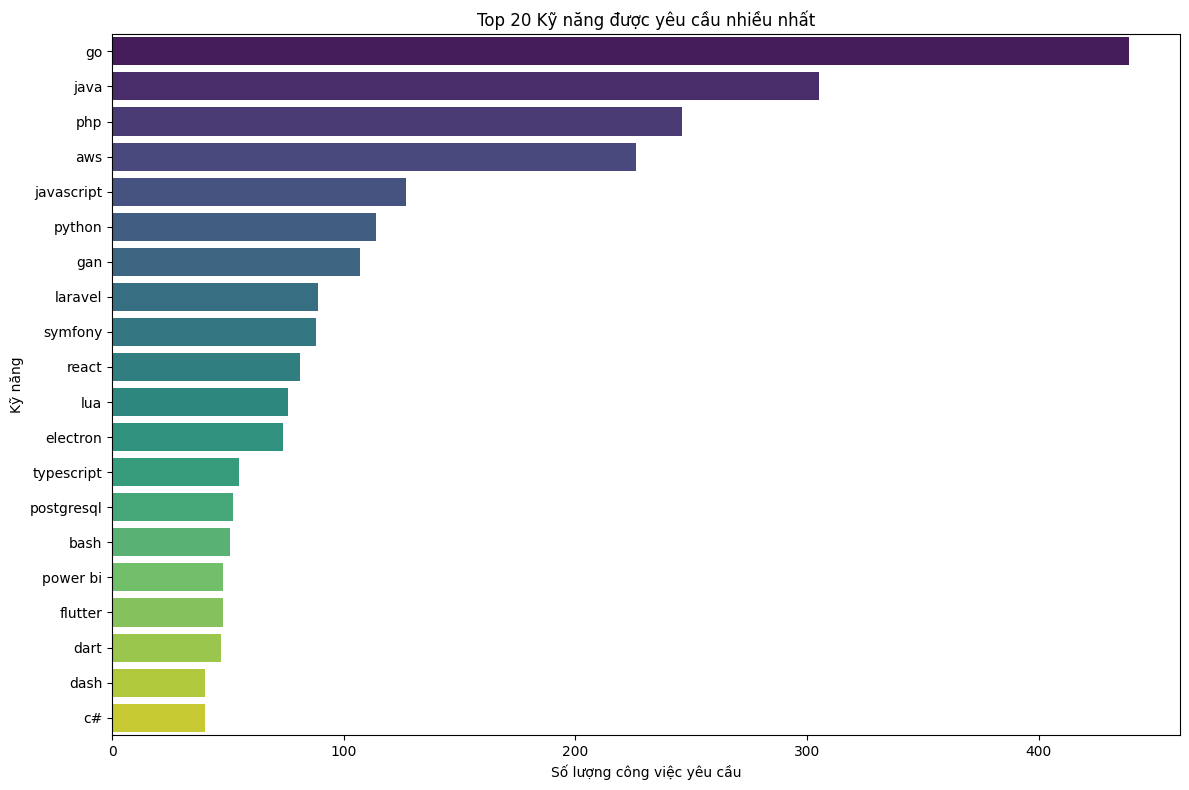

In [49]:
skills_series = df['primary_skills'].explode().dropna().str.strip()

# Đếm kỹ năng phổ biến nhất
skill_counts = Counter(skills_series)
top_skills = skill_counts.most_common(20)

# Chuyển thành DataFrame để vẽ biểu đồ
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title('Top 20 Kỹ năng được yêu cầu nhiều nhất')
plt.xlabel('Số lượng công việc yêu cầu')
plt.ylabel('Kỹ năng')
plt.tight_layout()
plt.show()

In [50]:
pd.DataFrame(df)

,id,title,company,location,salary,description,requirements,skills,language,skills_en,...,requirements_en,description_cleaned,requirements_cleaned,skills_cleaned,location_group,type_salary,primary_skills,secondary_skills,adjectives,adverbs
0,JOB_0,MLops Engineer,Trusting Social,Ho Chi Minh,You'll love it,We are looking for qualified MLops Engineer fo...,BS or MS in Computer Science or related fields...,"MLOps, Python, Linux, Docker, Data Science, Te...",en,"MLOps, Python, Linux, Docker, Data Science, Te...",...,BS or MS in Computer Science or related fields...,look qualified mlop engineer ekyc project help...,bs ms computer science relate field 1 3 year e...,"[MLOps, Python, Linux, Docker, Data Science, T...",2,5,"[python, java, javascript, c++, go, tensorflow...","[git, docker, linux]","[Great, such, plus, Basic, Familiar, proficien...",[]
1,JOB_1,"Senior DevOps Engineer (Cloud, AWS)",TymeX,Ho Chi Minh,You'll love it,We are seeking an experienced Senior DevOps En...,Requirements:\nBachelor's or Master's degree i...,"AWS, DevOps, Cloud, Cloud-native Architecture,...",en,"AWS, DevOps, Cloud, Cloud-native Architecture,...",...,Requirements:\nBachelor's or Master's degree i...,seek experienced senior devop engineer aw join...,requirement bachelor master degree computer sc...,"[AWS, DevOps, Cloud, Cloud-native Architecture...",2,5,"[python, go, bash, aws]","[git, gitlab, git flow, docker, jenkins, teamc...","[logical, Good, high, curious, more, related, ...","[least, independently, effectively, at]"
2,JOB_2,VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure),Viettel Group,Ha Noi,You'll love it,Ecotek đang dẫn dắt Ecopark phát triển trở thà...,"Tư duy logic tốt, tư duy hướng giải pháp, tư d...","Project Management, Business Analysis, Presale...",vi,"Project Management, Business Analysis, Presale...",...,"Good logical thinking, solution -oriented thin...",ecotek dẫn dắt ecopark phát triển mô hình thàn...,tư duy logic tư duy hướng giải pháp tư duy phả...,"[Project Management, Business Analysis, Presal...",1,5,[go],[],"[logical, Good, specific, least, General, crit...","[first, directly, At, clearly]"
3,JOB_3,VTS - Tư Vấn Giải Pháp - Presales Engineer,Viettel Group,Ha Noi,You'll love it,"Gia nhập “vũ trụ” công nghệ Viettel, nơi bạn k...",Bằng cấp: Tốt nghiệp Đại học (loại Khá trở lên...,"Presale, Business Analysis, Salesforce, Pre-sa...",vi,"Presale, Business Analysis, Salesforce, Pre-sa...",...,Degree: Graduated from university (good or hig...,gia nhập vũ trụ công nghệ viettel đắm chìm hàn...,bằng cấp tốt nghiệp đại học trở chuyên ngành c...,"[Presale, Business Analysis, Salesforce, Pre-s...",1,5,"[go, lua, electron]",[],"[English, higher, Dynamic, technological, read...",[always]
4,JOB_4,"VHT - Embedded Software Engineer (Linux, C++)",Viettel Group,Ha Noi,"650 - 2,200 USD","Với hơn 1200 nhân sự chất lượng cao , Tổng Côn...",Tốt nghiệp Đại học chính quy loại Khá trở lên ...,"Embedded, C++, Linux, C language, Embedded Eng...",vi,"Embedded, C++, Linux, C language, Embedded Eng...",...,Graduated with regular university or higher sp...,1200 nhân sự chất lượng tổng công ty công nghi...,tốt nghiệp đại học chính quy loại trở chuyên n...,"[Embedded, C++, Linux, C language, Embedded En...",1,2,"[go, electron]","[git, linux]","[English, digital, Good, basic, higher, electr...",[at]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,JOB_985,"AI Engineer (Python,GenAI, Azure)- Up to 50M",NTT DATA VDS,Ha Noi,"500 - 1,000 USD","About Us\n At EATLAB, we're a team that is har...",Must-Haves\nKnowledgable in your applied field...,"Python, C++, DevOps, Machine Learning, AI, AI ...",en,"Python, C++, DevOps, Machine Learning, AI, AI ...",...,Must-Haves\nKnowledgable in your applied field...,we eatlab team hardworking smart fast take act...,must have knowledgable apply field always upda...,"[Python, C++, DevOps, Machine Learning, AI, AI...",1,2,"[go, flask, fastapi, computer vision]",[segment],"[cool, free, Knowledgabl

In [51]:
df.to_csv('../data/clean/clean_jobs_v2.csv', index=False, encoding='utf-8')